Завдання 1
    У цьому завданні вам потрібно завантажити ось цей датасет. Ми з вами вже працювали з ним коли вивчали pandas. Це все також Топ-50 книг, що найбільше продаються на Amazon в період з 2009 по 2019 роки. Потрібно виконати наступне:

        Створити спарк сесію.
        Прочитати датасет в датафрейм.
        Використовуючи тільки RDD, обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7
        Побудувати гістограму розподілу рецензій (стовпчик Reviews).
        Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".
        Використовуючи бібліотеку seaborn, побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

In [16]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import mean
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
spark = SparkSession.builder.getOrCreate()
df = spark.read.format("csv").load("bestsellers with categories.csv", header=True)

In [18]:
user_rating = df.select(col("User Rating").alias("User_rating"))
user_rating = user_rating.filter("User_rating >= 4.7")
user_rating.select(
    mean("User_rating").alias("average rating"))

DataFrame[average rating: double]

array([[<Axes: title={'center': 'Reviews'}>]], dtype=object)

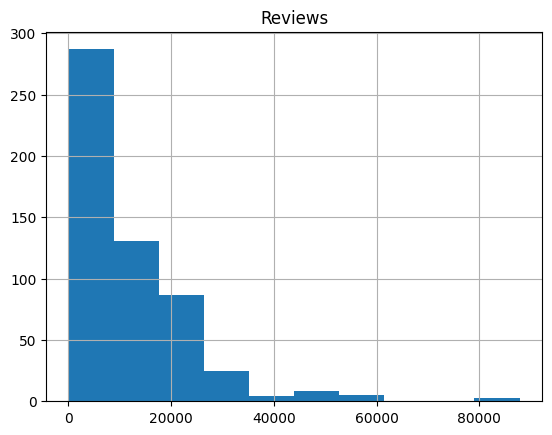

In [19]:
reviews = df.select("Reviews")
(reviews.toPandas()[["Reviews"]]).astype('float64').hist(column = "Reviews" )

In [20]:
df_ = df.select(df["User Rating"].cast("float"), df.Reviews.cast("float"), df.Price.cast("float"))
df_.toPandas().corr().abs()

,User Rating,Reviews,Price
User Rating,1.000000,0.001729,0.133086
Reviews,0.001729,1.000000,0.109182
Price,0.133086,0.109182,1.000000


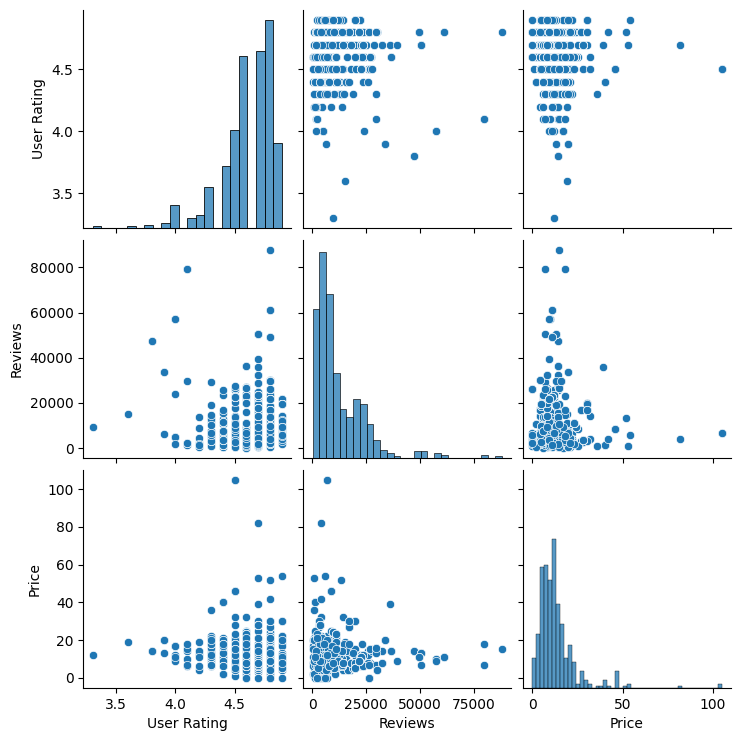

In [22]:
df = df_.toPandas()
sns.pairplot(df)

Завдання 2
    Під час виконання цього завдання дозволяється використовувати лише Spark SQL. Для датасету з попереднього завдання виконайте наступне:

        Знайдіть автора з найвищим рейтингом.
        Знайдіть трьох авторів із найнижчим рейтингом.
        Визначте, який автор отримав найбільшу кількість рецензій.
        Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.
        Визначте, яка книга жанру "Fiction" має найменший рейтинг.
        Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [38]:
df = spark.read.format("csv").load("bestsellers with categories.csv", header=True)
df.createOrReplaceTempView("df")
spark.sql("""
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating` desc
    """).show()

+--------------------+------------------+
|              Author|    Average Rating|
+--------------------+------------------+
|          Jill Twiss|               4.9|
|       Rush Limbaugh|               4.9|
|Sherri Duskey Rinker|               4.9|
|      Alice Schertle|               4.9|
|         Chip Gaines|               4.9|
|     Bill Martin Jr.|               4.9|
|      Patrick Thorpe|               4.9|
|      Nathan W. Pyle|               4.9|
|Emily Winfield Ma...|               4.9|
|          Pete Souza|               4.9|
|  Lin-Manuel Miranda|               4.9|
|         Sarah Young|4.8999999999999995|
|          Dav Pilkey|4.8999999999999995|
|          Eric Carle|4.8999999999999995|
|           Dr. Seuss| 4.877777777777777|
|       Mark R. Levin|              4.85|
|       J. K. Rowling|              4.85|
|     Brandon Stanton| 4.833333333333333|
|      Phil Robertson|               4.8|
|        Drew Daywalt|               4.8|
+--------------------+------------

In [31]:
spark.sql(
    """
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating`
      Limit 3
    """
).show()

+--------------+--------------+
|        Author|Average Rating|
+--------------+--------------+
|   Donna Tartt|           3.9|
| Gillian Flynn|           4.0|
|Muriel Barbery|           4.0|
+--------------+--------------+



In [33]:
rev_ = df.select(df["Reviews"].cast("float"), df["Author"])
rev_.createOrReplaceTempView("rev_")

spark.sql(
    """
      Select Author, Reviews
      From rev_
      Order by Reviews desc
      Limit 1
    """
).show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|87841.0|
+-----------+-------+



In [34]:
spark.sql(
    """
      Select 
        Author, COUNT(*) AS `number of books`
      From df
      Group By Author
      Order by `number of books` desc
      Limit 1
    """
).show()

+-----------+---------------+
|     Author|number of books|
+-----------+---------------+
|Jeff Kinney|             12|
+-----------+---------------+



In [36]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre, Author
      From df
      Where Genre = 'Fiction'
      Order by `User Rating`
      Limit 1
    """
).show()

+------------------+-----------+-------+------------+
|              Name|User Rating|  Genre|      Author|
+------------------+-----------+-------+------------+
|The Casual Vacancy|        3.3|Fiction|J.K. Rowling|
+------------------+-----------+-------+------------+



In [44]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre
      From df
      Where Genre = 'Non Fiction'
      Order by `User Rating` desc
      Limit 10
    """
).show()

+--------------------+-----------+-----------+
|                Name|User Rating|      Genre|
+--------------------+-----------+-----------+
|Humans of New Yor...|        4.9|Non Fiction|
|Unfreedom of the ...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|  The Magnolia Story|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Obama: An Intimat...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
+--------------------+-----------+-----------+



Завдання 3
    Побудуйте гістограму середньої кількості рецензій за роками. У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

<Axes: xlabel='Year'>

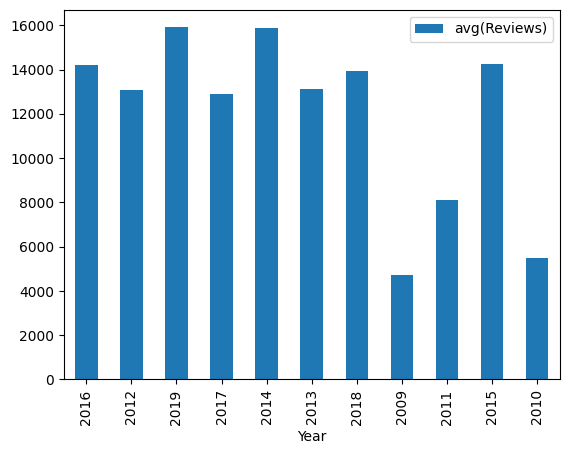

In [46]:
df_avg = df.groupBy("Year").agg({"Reviews": "avg"})
df_avg.toPandas().plot(x="Year", y="avg(Reviews)", kind = "bar")

<Axes: xlabel='Genre'>

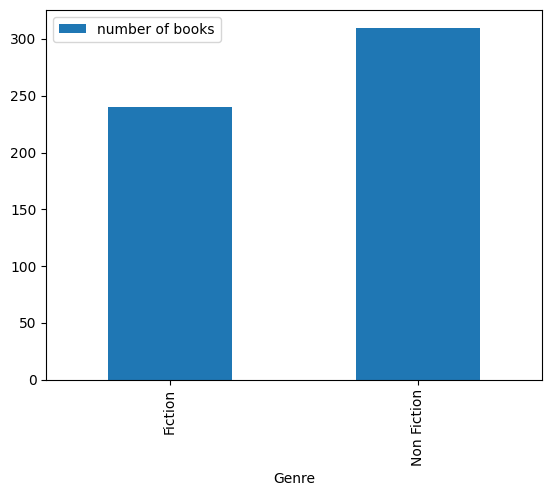

In [47]:
genre = spark.sql(
    """
      Select
        Genre, COUNT(*) AS `number of books`
      From df
      Group by Genre
    """
)
genre.toPandas().plot(x="Genre", y = "number of books", kind="bar")